## Business Questions
Your analytical and business skills are needed to provide clarity in the following aspects:

    How should products be classified into different categories to simplify reports and analysis?
    What is the distribution of product prices across different categories?
    How many products are being discounted?
    How big are the offered discounts as a percentage of the product prices?
### TODO: How do seasonality and special dates (Christmas, Black Friday) affect sales?
### TODO: How could data collection be improved?

# I can use the last bonus challenge from Seaborn as a starting point for seasonality: maybe use categories instead of top 10 brands

## Initialization

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
'''file permission needs to be set accessible to all that have the link!'''
url_orderlines  = "https://drive.google.com/file/d/1LraLLVLIIkD_4cJ83jQ-kDial9nNvxKk/view?usp=drive_link"
url_brands      = 'https://drive.google.com/file/d/1K8IdztNlR7UA9QkWii2CpZUEslvz7tUh/view?usp=drive_link'
url_orders      = 'https://drive.google.com/file/d/1zwwDSJfshd1sCYpSpodTL0puxc9RSLAC/view?usp=drive_link'
url_products    = 'https://drive.google.com/file/d/1hmTeVVEuhXx7klBI-1yY0Tl1Qh6psZGB/view?usp=drive_link'

path_orderlines = "https://drive.google.com/uc?export=download&id=" + url_orderlines.split("/")[-2]
path_brands     = "https://drive.google.com/uc?export=download&id=" + url_brands.split("/")[-2]
path_orders     = "https://drive.google.com/uc?export=download&id=" + url_orders.split("/")[-2]
path_products   = "https://drive.google.com/uc?export=download&id=" + url_products.split("/")[-2]

In [3]:
# read quality_controlled dfs
orderlines_df   = pd.read_csv(path_orderlines)
brands_df       = pd.read_csv(path_brands)
orders_df       = pd.read_csv(path_orders)
products_df     = pd.read_csv(path_products)

# create copy dfs to work with:
orderlines  = orderlines_df.copy()
brands      = brands_df.copy()
orders      = orders_df.copy()
products    = products_df.copy()

# make date cols to datetime again
orders["created_date"] = pd.to_datetime(orders["created_date"])
orderlines["date"] = pd.to_datetime(orderlines["date"])

In [4]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40985 entries, 0 to 40984
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          40985 non-null  int64         
 1   created_date      40985 non-null  datetime64[ns]
 2   total_paid        40985 non-null  float64       
 3   state             40985 non-null  object        
 4   unit_price_total  40985 non-null  float64       
 5   price_diff        40985 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 1.9+ MB


In [5]:
orderlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53231 entries, 0 to 53230
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                53231 non-null  int64         
 1   id_order          53231 non-null  int64         
 2   product_id        53231 non-null  int64         
 3   product_quantity  53231 non-null  int64         
 4   sku               53231 non-null  object        
 5   unit_price        53231 non-null  float64       
 6   date              53231 non-null  datetime64[ns]
 7   unit_price_total  53231 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(4), object(1)
memory usage: 3.2+ MB


In [6]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9992 entries, 0 to 9991
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sku       9992 non-null   object 
 1   name      9992 non-null   object 
 2   desc      9992 non-null   object 
 3   price     9992 non-null   float64
 4   in_stock  9992 non-null   int64  
 5   type      9946 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 468.5+ KB


## Discount

In [7]:
orderlines = orderlines.merge(right=products[['sku', 'price']],
                 how='left', on='sku')

In [8]:
orderlines = orderlines.rename(columns={'price': 'prod_price'})
orderlines['discount'] = orderlines.prod_price - orderlines.unit_price
orderlines['discount_percent'] = (orderlines.discount / orderlines.prod_price).round(2)*100
orderlines.head()

,id,id_order,product_id,product_quantity,sku,unit_price,date,unit_price_total,prod_price,discount,discount_percent
0,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16,47.49,60.99,13.50,22.0
1,1119119,299546,0,1,IOT0014,18.99,2017-01-01 01:50:34,18.99,22.95,3.96,17.0
2,1119120,295347,0,1,APP0700,72.19,2017-01-01 01:54:11,72.19,89.00,16.81,19.0
3,1119134,299556,0,1,CRU0039-A,60.90,2017-01-01 02:20:14,60.90,76.99,16.09,21.0
4,1119145,299561,0,1,PEB0015,142.49,2017-01-01 02:38:50,142.49,299.99,157.50,53.0


In [9]:
orderlines.discount.describe()

count    53231.000000
mean        26.116673
std         45.545881
min       -170.990000
25%          5.250000
50%         15.000000
75%         31.000000
max       1320.000000
Name: discount, dtype: float64

In [10]:
orderlines.discount_percent.describe()

count    53231.000000
mean        21.370987
std         18.133347
min       -212.000000
25%          9.000000
50%         18.000000
75%         29.000000
max         97.000000
Name: discount_percent, dtype: float64

In [11]:
orderlines.loc[orderlines.discount < 0].count()#head(10)

id                  1571
id_order            1571
product_id          1571
product_quantity    1571
sku                 1571
unit_price          1571
date                1571
unit_price_total    1571
prod_price          1571
discount            1571
discount_percent    1571
dtype: int64

<Axes: xlabel='prod_price', ylabel='discount'>

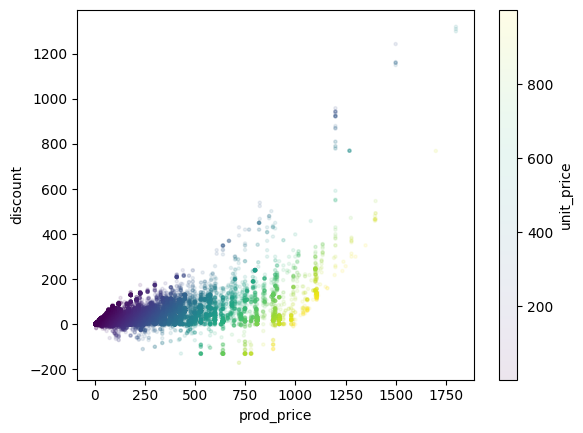

In [12]:
orderlines.plot.scatter(x='prod_price', y='discount', c='unit_price',
                               alpha=0.1, marker='.')

# above 1000€ base price, each sold product got a discount

In [13]:
# calculate the quartiles
Q1 = orderlines.discount.quantile(0.25)
Q3 = orderlines.discount.quantile(0.75)

# calculate the interquartile range
IQR = Q3-Q1

# filter the DataFrame to include only "non-outliers"
#orderlines_filtered = orderlines.loc[(orderlines.discount >= (Q1 - 1.5*IQR))
#                                    & (orderlines.discount <= (Q3 + 1.5*IQR))]

# filter the DataFrame to include only positive discount values
orderlines_filtered = orderlines.loc[orderlines.discount > 0]

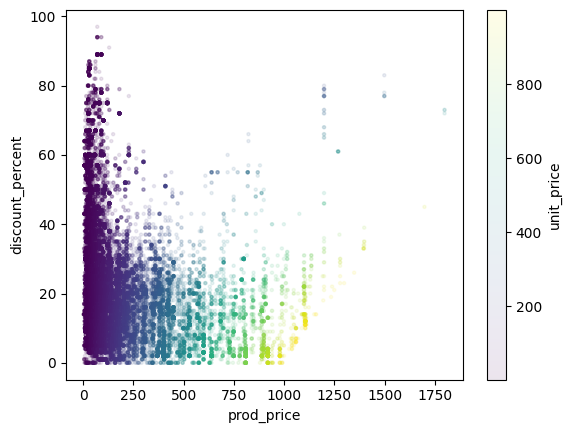

In [14]:
orderlines_filtered.plot.scatter(x='prod_price',
                                 y='discount_percent',
                                 c='unit_price',
                                 alpha=0.1,
                                 marker='.'
                                );

In [16]:
# create discount categories

orderlines['discount_cat'] = ''

orderlines.loc[orderlines.discount_percent.between(left=0, right=5), 'discount_cat'] = '0-5%'
orderlines.loc[orderlines.discount_percent.between(left=5, right=15), 'discount_cat'] = '5-15%'
orderlines.loc[orderlines.discount_percent.between(left=15, right=35), 'discount_cat'] = '15-35%'
orderlines.loc[orderlines.discount_percent > 35, 'discount_cat'] = '>35%%'

orderlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53231 entries, 0 to 53230
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                53231 non-null  int64         
 1   id_order          53231 non-null  int64         
 2   product_id        53231 non-null  int64         
 3   product_quantity  53231 non-null  int64         
 4   sku               53231 non-null  object        
 5   unit_price        53231 non-null  float64       
 6   date              53231 non-null  datetime64[ns]
 7   unit_price_total  53231 non-null  float64       
 8   prod_price        53231 non-null  float64       
 9   discount          53231 non-null  float64       
 10  discount_percent  53231 non-null  float64       
 11  discount_cat      53231 non-null  object        
dtypes: datetime64[ns](1), float64(5), int64(4), object(2)
memory usage: 4.9+ MB


In [17]:
orderlines.discount_cat.value_counts()
#orderlines.head()

discount_cat
15-35%    22708
5-15%     14042
>35%%      8977
0-5%       6656
            848
Name: count, dtype: int64

In [18]:
multi_sales = orderlines.groupby(by='sku')['sku'].count()
multi_sales = multi_sales.loc[multi_sales > 100]

# filter orderlines for products that were sold multiple times
ol_multi = orderlines.loc[orderlines.sku.isin(multi_sales.index.unique())].copy()

In [19]:
top20 = (orderlines.groupby(by='sku')
                .agg({'product_quantity': 'sum'})
                .nlargest(20, 'product_quantity').index
)

#def calc_sales_increase(without_discount, with_discount):
#    return with_discount / without_discount

ol_top20 = orderlines.loc[orderlines.sku.isin(top20)].copy()
ol_top20 = (ol_top20
            .groupby(by=['sku', 'discount_cat'])
            .agg({'product_quantity': 'sum'}))
#ol_top20

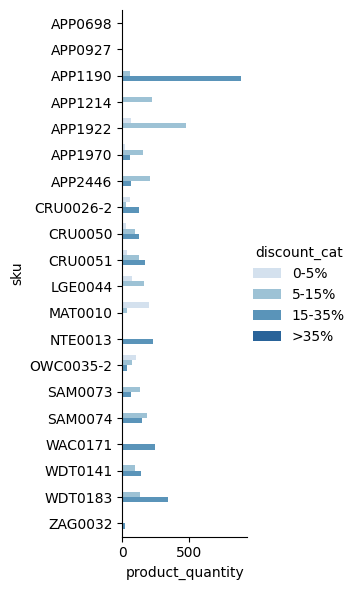

In [20]:
import seaborn as sns

hue_order = ['0-5%', '5-15%', '15-35%', '>35%']

sns.catplot(kind="bar",
            data=ol_top20,
            x="product_quantity",
            y="sku",
            height=6,
            aspect=0.5,
            palette="Blues",
            hue='discount_cat', hue_order=hue_order,
            );

## Categories

In [21]:
# add category column to products
products["category"] = ""

#get count of products based on type column
products.groupby(["type"]).agg({"sku":"count"}).sort_values(by='sku' , ascending=False)

#Assign categories based on type
products.loc[products["type"]=="11865403", "category"] = "iPhone accessories"
products.loc[products["type"]=="12175397", "category"] = "Servers"
# can we combine 1298 and 1282 as Mac and accessories
products.loc[products["type"]=="1298", "category"] = "Macbook "
products.loc[products["type"]=="1,02E+12", "category"] = "Apple MacBook "
products.loc[products["type"]=="1282", "category"] = "Mac and accessories"
products.loc[products["type"]=="13835403", "category"] = "Macbook case and Backpacks"
products.loc[products["type"]=="11935397", "category"] = "External Storage"
products.loc[products["type"]=="57445397", "category"] = "Memory card"
products.loc[products["type"]=="11905404", "category"] = "Drones, smartwatch, security systems"
products.loc[products["type"]=="12635403", "category"] = "iPad accessories"
products.loc[products["type"]=="5,74E+15", "category"] = "iMac"
products.loc[products["type"]=="1364", "category"] = "iMac accessories"
products.loc[products["type"]=="12585395", "category"] = "Adapters"
products.loc[products["type"]=="1296", "category"] = "Monitors"
products.loc[products["type"]=="1325", "category"] = "Cables"
products.loc[products["type"]=="5384", "category"] = "Headphones and accessories"
products.loc[products["type"]=="1433", "category"] = "Installation/Upgrade Kit"
products.loc[products["type"]=="12215397", "category"] = "External Storage"
products.loc[products["type"]=="5398", "category"] = "Speakers"
products.loc[products["type"]=="1,44E+11", "category"] = "iPhone/iPad repair service"


In [ ]:
products.loc[products["type"]=="12215397"]

In [22]:
products.category.value_counts(), products.category.value_counts(normalize=True)

(category
                                         3104
 iPhone accessories                      1057
 Servers                                  939
 Macbook                                  783
 External Storage                         732
 Drones, smartwatch, security systems     454
 Mac and accessories                      373
 iPad accessories                         362
 Macbook case and Backpacks               269
 iMac                                     247
 iMac accessories                         216
 Adapters                                 190
 Monitors                                 187
 Cables                                   183
 Headphones and accessories               178
 Installation/Upgrade Kit                 171
 Speakers                                 159
 Apple MacBook                            130
 Memory card                              129
 iPhone/iPad repair service               129
 Name: count, dtype: int64,
 category
                                

## New Column Season

In [201]:
orderlines_filtered.date = pd.to_datetime(orderlines_filtered.date)
orderlines_filtered.date = orderlines_filtered['date'].dt.date
orderlines_filtered.date = pd.to_datetime(orderlines_filtered.date)
#orderlines_filtered.info()

In [202]:
orderlines_filtered['season'] = 'None'
orderlines_filtered.loc[(orderlines_filtered['date']=='2017-02-14') | (orderlines_filtered['date']=='2018-02-14'), 'season'] = "Valentine's Day"
orderlines_filtered.loc[(orderlines_filtered['date']>='2017-11-23') & (orderlines_filtered['date']<='2017-11-26'), 'season'] = 'Black Friday'
orderlines_filtered.loc[(orderlines_filtered['date']=='2017-11-27'), 'season'] = 'Cyber Monday'
orderlines_filtered.loc[(orderlines_filtered['date']>='2017-12-24') & (orderlines_filtered['date']<='2018-01-01'), 'season'] = 'Christmas'
orderlines_filtered.loc[(orderlines_filtered['date']>='2018-01-02') & (orderlines_filtered['date']<='2018-01-03'), 'season'] = 'New Year Sales'
orderlines_filtered.head()

,id_order,product_quantity,sku,unit_price,date,tot_unit_price,prod_price,discount,discount_percent,season,tot_prod_price,tot_discount
0,299545,1,OWC0100,47.49,2017-01-01,47.49,60.99,13.50,22.0,None,60.99,13.50
1,299546,1,IOT0014,18.99,2017-01-01,18.99,22.95,3.96,17.0,None,22.95,3.96
2,295347,1,APP0700,72.19,2017-01-01,72.19,89.00,16.81,19.0,None,89.00,16.81
3,299556,1,CRU0039-A,60.90,2017-01-01,60.90,76.99,16.09,21.0,None,76.99,16.09
4,299561,1,PEB0015,142.49,2017-01-01,142.49,299.99,157.50,53.0,None,299.99,157.50


In [203]:
orderlines_filtered.season.value_counts(normalize=True)

season
None               0.826897
Black Friday       0.081390
Christmas          0.046029
Cyber Monday       0.022913
New Year Sales     0.014371
Valentine's Day    0.008400
Name: proportion, dtype: float64

# Seasonal Analysis

## Seasonality with discount_percent

In [29]:
orderlines_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49404 entries, 0 to 53230
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                49404 non-null  int64         
 1   id_order          49404 non-null  int64         
 2   product_id        49404 non-null  int64         
 3   product_quantity  49404 non-null  int64         
 4   sku               49404 non-null  object        
 5   unit_price        49404 non-null  float64       
 6   date              49404 non-null  datetime64[ns]
 7   unit_price_total  49404 non-null  float64       
 8   prod_price        49404 non-null  float64       
 9   discount          49404 non-null  float64       
 10  discount_percent  49404 non-null  float64       
 11  season            49404 non-null  object        
dtypes: datetime64[ns](1), float64(5), int64(4), object(2)
memory usage: 4.9+ MB


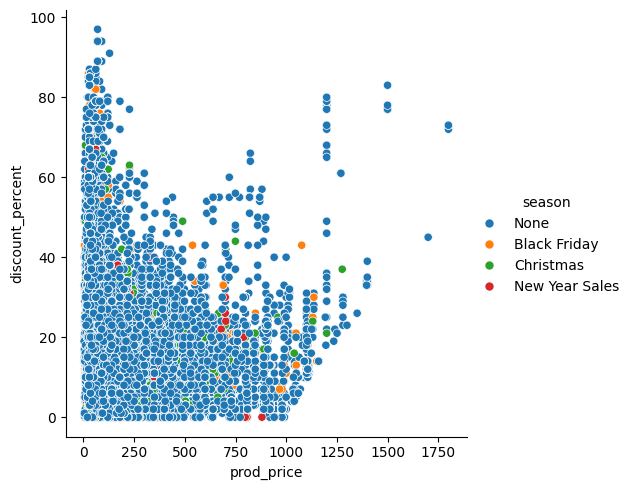

In [30]:
sns.relplot(data=orderlines_filtered,
            x='prod_price',
            y='discount_percent',
            hue='season'
           );

## When are the largest sales? Black Friday and Christmas

In [31]:
day_income_all_sellers = orderlines_filtered.groupby('date')[['unit_price']].sum().reset_index()
day_income_all_sellers.info()
day_income_all_sellers['season'] = orderlines_filtered['season']
day_income_all_sellers.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49064 entries, 0 to 49063
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        49064 non-null  datetime64[ns]
 1   unit_price  49064 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 766.8 KB


,date,unit_price,season
0,2017-01-01 01:46:16,47.49,None
1,2017-01-01 01:50:34,18.99,None
2,2017-01-01 01:54:11,72.19,None
3,2017-01-01 02:20:14,60.90,None
4,2017-01-01 02:38:50,142.49,None


In [32]:
day_income_all_sellers['season'] = 'None'
day_income_all_sellers.loc[(day_income_all_sellers['date']=='2017-02-14') | (day_income_all_sellers['date']=='2018-02-14'), 'season'] = "Valentine's Day"
day_income_all_sellers.loc[(day_income_all_sellers['date']>='2017-11-23') & (day_income_all_sellers['date']<='2017-11-26'), 'season'] = 'Black Friday'
day_income_all_sellers.loc[(day_income_all_sellers['date']=='2017-11-27'), 'season'] = 'Cyber Monday'
day_income_all_sellers.loc[(day_income_all_sellers['date']>='2017-12-24') & (day_income_all_sellers['date']<='2018-01-01'), 'season'] = 'Christmas'
day_income_all_sellers.loc[(day_income_all_sellers['date']>='2018-01-02') & (day_income_all_sellers['date']<='2018-01-03'), 'season'] = 'New Year Sales'
day_income_all_sellers.head()

,date,unit_price,season
0,2017-01-01 01:46:16,47.49,None
1,2017-01-01 01:50:34,18.99,None
2,2017-01-01 01:54:11,72.19,None
3,2017-01-01 02:20:14,60.90,None
4,2017-01-01 02:38:50,142.49,None


In [33]:
day_income_all_sellers.season.value_counts()

season
None              43297
Black Friday       3294
Christmas          2011
New Year Sales      462
Name: count, dtype: int64

In [34]:
day_income_all_sellers.nlargest(10, 'unit_price')

,date,unit_price,season
4887,2017-01-29 19:02:48,1292.99,None
8836,2017-04-21 08:50:11,1161.99,None
39656,2018-01-04 13:02:37,1094.58,None
28958,2017-11-24 11:46:25,1055.02,Black Friday
26088,2017-11-13 10:47:38,1023.00,None
26202,2017-11-14 15:03:12,1023.00,None
24075,2017-10-26 11:48:17,1016.33,None
26936,2017-11-21 10:02:37,1010.00,None
7725,2017-02-22 13:49:44,1007.99,None
15580,2017-07-21 17:39:38,1001.00,None


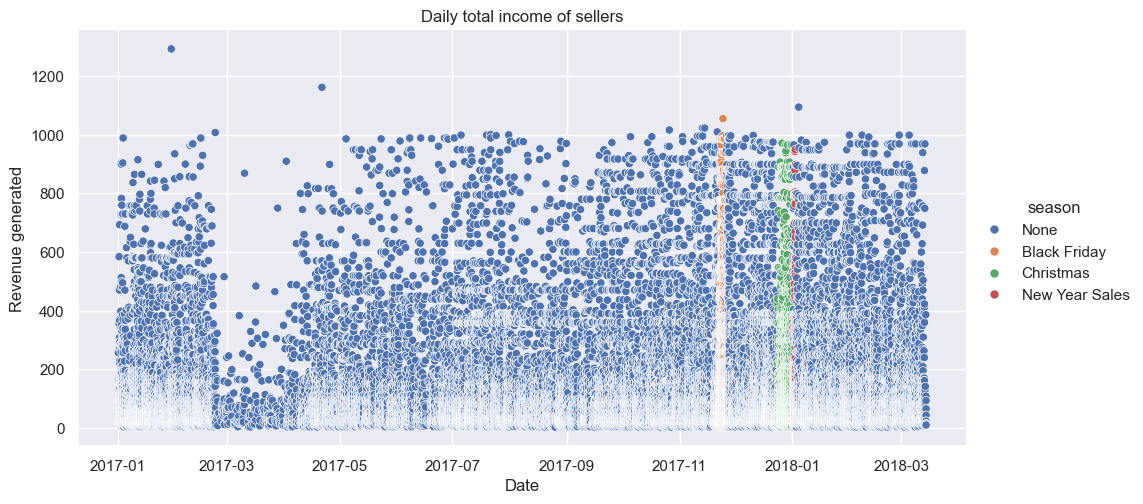

In [35]:
sns.set_theme(style="darkgrid")

(
sns.relplot(data = day_income_all_sellers,
            x="date",
            y="unit_price",
            hue='season',
            aspect=2
           )
    .set_axis_labels("Date",
                     "Revenue generated")
    .set(title="Daily total income of sellers")
);

## When are the largest number of orders placed? Black Friday and Christmas

In [141]:
#orderlines_filtered.groupby('date')[['unit_price']].sum().reset_index()
orderlines_filtered.head()

,id_order,product_quantity,sku,unit_price,date,tot_unit_price,prod_price,discount,discount_percent,season,tot_prod_price,tot_discount
0,299545,1,OWC0100,47.49,2017-01-01 01:46:16,47.49,60.99,13.50,22.0,None,60.99,13.50
1,299546,1,IOT0014,18.99,2017-01-01 01:50:34,18.99,22.95,3.96,17.0,None,22.95,3.96
2,295347,1,APP0700,72.19,2017-01-01 01:54:11,72.19,89.00,16.81,19.0,None,89.00,16.81
3,299556,1,CRU0039-A,60.90,2017-01-01 02:20:14,60.90,76.99,16.09,21.0,None,76.99,16.09
4,299561,1,PEB0015,142.49,2017-01-01 02:38:50,142.49,299.99,157.50,53.0,None,299.99,157.50


In [211]:
orderlines_filtered.groupby('season')['tot_unit_price'].sum()#.value_counts()#count().nlargest(10)

season
Black Friday        767260.27
Christmas           352605.18
Cyber Monday        196828.65
New Year Sales      102971.40
None               5758688.97
Valentine's Day      63768.95
Name: tot_unit_price, dtype: float64

### More than 10% of total orders per year are placed during Black Friday (including Cyber Monday)

In [205]:
orderlines_filtered.season.value_counts(normalize=True).head(10)

season
None               0.826897
Black Friday       0.081390
Christmas          0.046029
Cyber Monday       0.022913
New Year Sales     0.014371
Valentine's Day    0.008400
Name: proportion, dtype: float64

In [162]:
orderlines_filtered.id_order.count()

49404

In [160]:
orderlines_filtered.loc[orderlines_filtered['season']==['Black Friday'], 'id_order'].count()

3343

## New columns with tot numbers per product_quantity

In [39]:
orderlines_filtered = orderlines_filtered.rename(columns={'unit_price_total': 'tot_unit_price'})
orderlines_filtered['tot_prod_price'] = orderlines_filtered.prod_price * orderlines_filtered.product_quantity
del orderlines_filtered['product_id']
del orderlines_filtered['id']
orderlines_filtered['tot_discount'] = orderlines_filtered.discount * orderlines_filtered.product_quantity

In [40]:
(orderlines_filtered
     .loc[orderlines_filtered['date']=='2017-11-24']
     .sort_values(by='product_quantity', ascending=False)
     .head()
)

,id_order,product_quantity,sku,unit_price,date,tot_unit_price,prod_price,discount,discount_percent,season,tot_prod_price,tot_discount


## What are the discounts in the day with the largest number of orders, i.e. 2017-11-24?

In [41]:
largest_n_orders = (orderlines_filtered
                       .loc[orderlines_filtered['date']=='2017-11-24']
                       .sort_values(by='discount_percent', ascending=False)
                  )
largest_n_orders.head()

,id_order,product_quantity,sku,unit_price,date,tot_unit_price,prod_price,discount,discount_percent,season,tot_prod_price,tot_discount


In [42]:
tot_income_discounted = largest_n_orders.tot_unit_price.sum()
tot_income_catalogue = largest_n_orders.tot_prod_price.sum().round(2)
tot_discounts = largest_n_orders.tot_discount.sum()

tot_income_discounted, tot_income_catalogue, tot_income_catalogue-tot_income_discounted, tot_discounts

(0.0, 0.0, 0.0, 0.0)

## Average discounts (even though they might be meaningless)

In [43]:
avg_year_discount = (orderlines_filtered.loc[orderlines_filtered['date'].dt.year==2017]
                         .groupby(orderlines_filtered.date.dt.year)
                         ['discount_percent']
                         .mean()
                    ).values[0].round(2)

print('The average discount of 2017 is', avg_year_discount, '%')

The average discount of 2017 is 23.12 %


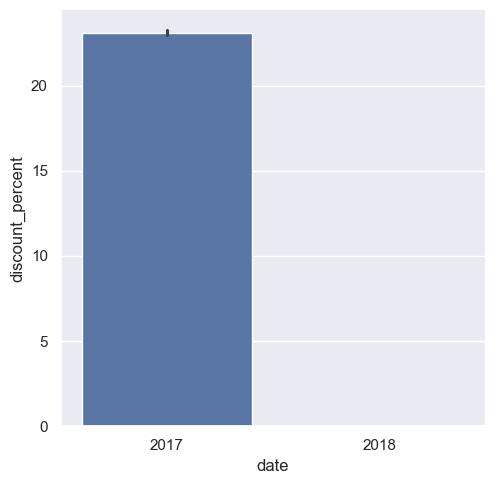

In [44]:
sns.catplot(kind='bar',
            data=orderlines_filtered.loc[orderlines_filtered['date'].dt.year==2017],
            x=orderlines_filtered.date.dt.year,
            y='discount_percent',
            #y='tot_discount',
            #errorbar=None,
            #estimator='sum'
            );

In [45]:
(orderlines_filtered.loc[orderlines_filtered['date'].dt.year==2017]
     .groupby(orderlines_filtered.date.dt.month)
     ['discount_percent']
     .mean()
     .nlargest(10)
)

date
1     27.741436
7     27.095722
3     24.145251
10    23.690947
11    22.559570
8     22.539759
9     22.501784
2     22.409012
4     20.796351
6     20.334646
Name: discount_percent, dtype: float64

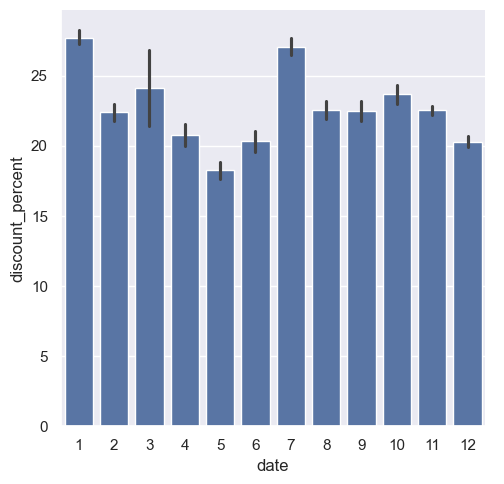

In [46]:
sns.catplot(kind='bar',
            data=orderlines_filtered.loc[orderlines_filtered['date'].dt.year==2017],
            x=orderlines_filtered.date.dt.month,
            y='discount_percent',
            #y='tot_discount',
            #errorbar=None,
            #estimator='sum'
            );

## When are the largest discounts applied?
### Plot the tot_income_discounted, tot_income_catalogue and tot_discounts

<Axes: xlabel='date'>

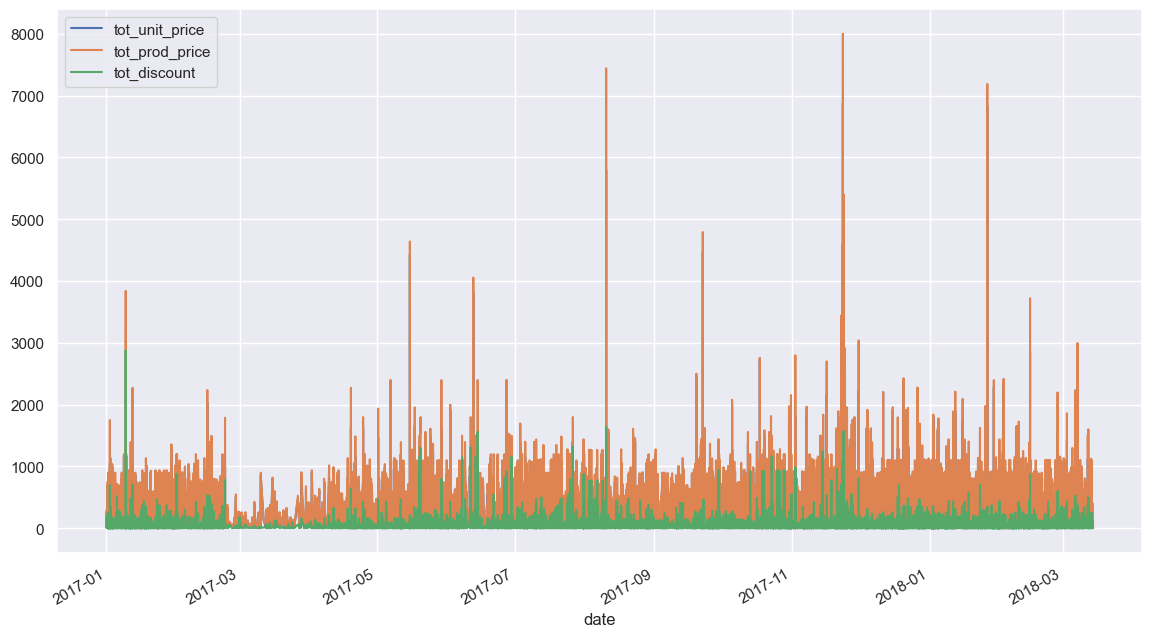

In [47]:
orderlines_filtered.groupby('date')[['tot_unit_price', 'tot_prod_price', 'tot_discount']].sum().plot(figsize=(14,8))

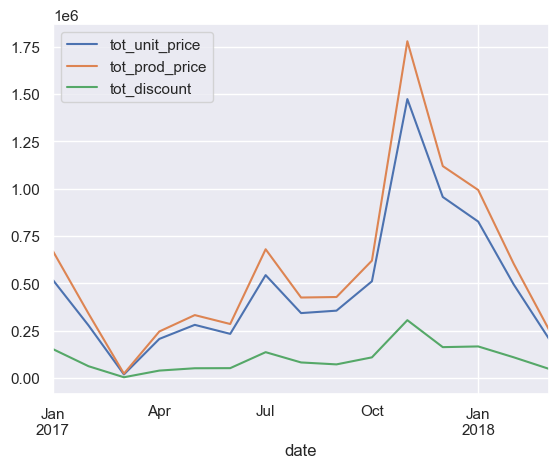

In [48]:
# Monthly income of all the sales
(
orderlines_filtered
    .resample("M", on="date")[['tot_unit_price', 'tot_prod_price', 'tot_discount']]
    .sum()
).plot();

#orderlines_filtered.groupby('date')[['tot_unit_price', 'tot_prod_price', 'tot_discount']].sum().plot(figsize=(14,8))

In [49]:
orderlines_filtered.loc[orderlines_filtered['date']=='2017-03-30'].head()

,id_order,product_quantity,sku,unit_price,date,tot_unit_price,prod_price,discount,discount_percent,season,tot_prod_price,tot_discount


In [50]:
orderlines_filtered.head()

,id_order,product_quantity,sku,unit_price,date,tot_unit_price,prod_price,discount,discount_percent,season,tot_prod_price,tot_discount
0,299545,1,OWC0100,47.49,2017-01-01 01:46:16,47.49,60.99,13.50,22.0,None,60.99,13.50
1,299546,1,IOT0014,18.99,2017-01-01 01:50:34,18.99,22.95,3.96,17.0,None,22.95,3.96
2,295347,1,APP0700,72.19,2017-01-01 01:54:11,72.19,89.00,16.81,19.0,None,89.00,16.81
3,299556,1,CRU0039-A,60.90,2017-01-01 02:20:14,60.90,76.99,16.09,21.0,None,76.99,16.09
4,299561,1,PEB0015,142.49,2017-01-01 02:38:50,142.49,299.99,157.50,53.0,None,299.99,157.50


## Plots of total revenue and discounts in 2017

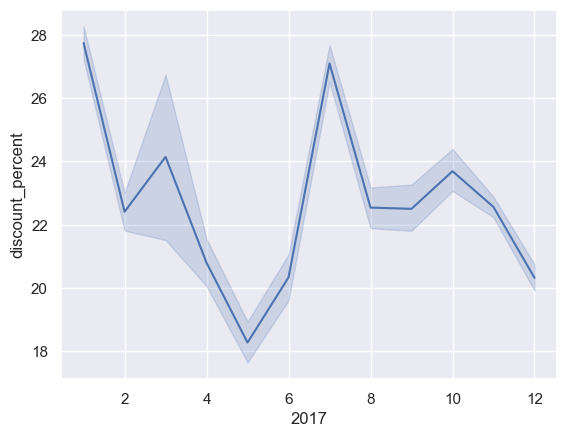

In [51]:
sns.lineplot(#kind='bar',
            data=orderlines_filtered.loc[orderlines_filtered['date'].dt.year==2017],
            x=orderlines_filtered.date.dt.month,
            y='discount_percent',
            #errorbar='sd', # error bar based on standard deviation rather than confidence interval
            );
plt.xlabel("2017");
#plt.title('Average discount_prcntg with 95% Confidence interval');
plt.savefig("avg_monthly_discount.png")

Text(0.5, 1.0, 'Total revenue over 1 year')

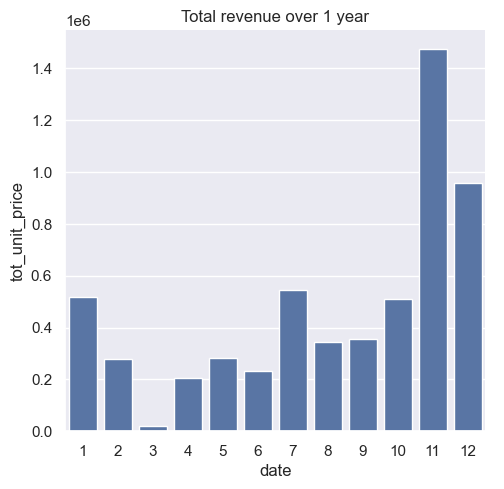

In [52]:
sns.catplot(kind='bar',
            data=orderlines_filtered.loc[orderlines_filtered['date'].dt.year==2017],
            x=orderlines_filtered.date.dt.month,
            y='tot_unit_price',
            #y='product_quantity',
            errorbar=None,
            estimator='sum'
            )
plt.title('Total revenue over 1 year')

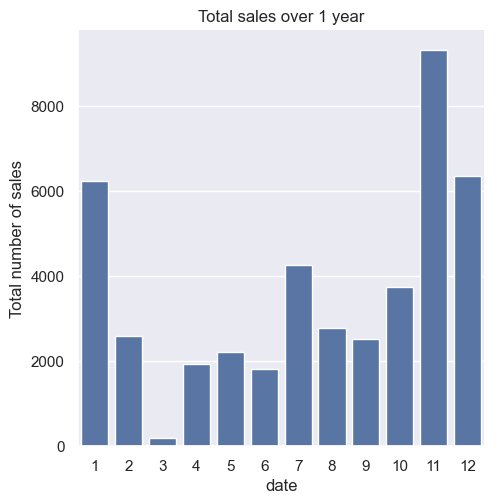

In [53]:
sns.catplot(kind='bar',
            data=orderlines_filtered.loc[orderlines_filtered['date'].dt.year==2017],
            x=orderlines_filtered.date.dt.month,
            #y='tot_unit_price',
            y='product_quantity',
            errorbar=None,
            estimator='sum'
            )
plt.title('Total sales over 1 year')
plt.ylabel("Total number of sales");
plt.savefig("monthly.png")

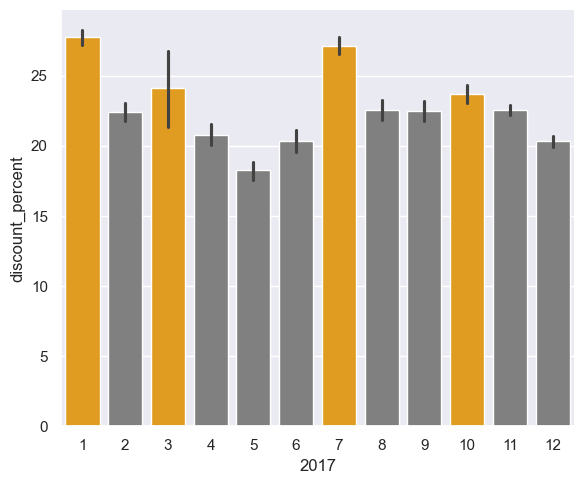

In [55]:
average_discounts= (orderlines_filtered.loc[orderlines_filtered['date'].dt.year==2017]
                  .groupby(orderlines_filtered.date.dt.month)
                  ['discount_percent']
                  .mean()
                  #.nlargest(3)
                 )

colors = ['grey'
          if (value < avg_year_discount)
          else 'orange'
              for value in average_discounts
         ]

sns.catplot(kind='bar',
            data=orderlines_filtered.loc[orderlines_filtered['date'].dt.year==2017],
            x=orderlines_filtered.date.dt.month,
            y='discount_percent',
            #errorbar='sd', # error bar based on standard deviation rather than confidence interval
            palette=colors,
            aspect=1.2
            );
plt.xlabel("2017");
#plt.title('Average discount_prcntg with 95% Confidence interval');
plt.savefig("avg_monthly_discount.png")

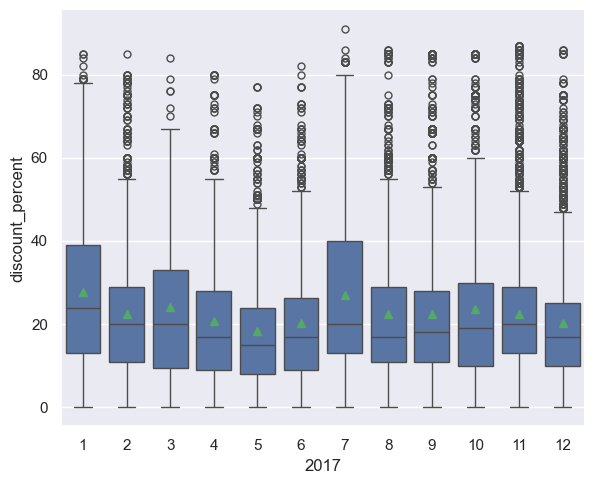

In [56]:
sns.catplot(kind='box',
            data=orderlines_filtered.loc[orderlines_filtered['date'].dt.year==2017],
            x=orderlines_filtered.date.dt.month,
            y='discount_percent',
            aspect=1.2,
            showmeans=True,
            #whis=(0, 100)
            );
plt.xlabel("2017");
#plt.title('Average discount_prcntg with 95% Confidence interval');
plt.savefig("avg_monthly_discount_boxplot.png")

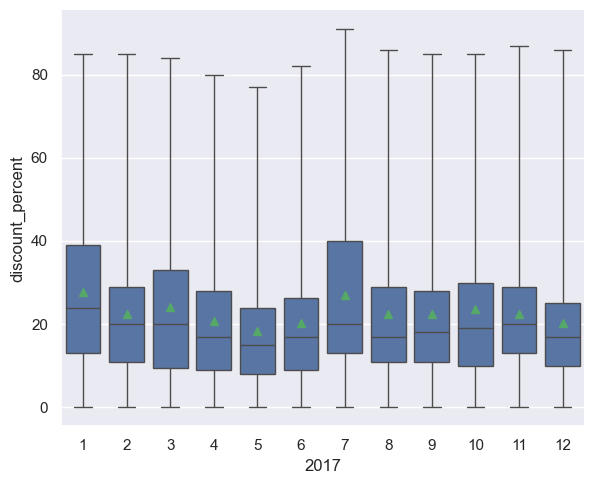

In [57]:
sns.catplot(kind='box',
            data=orderlines_filtered.loc[orderlines_filtered['date'].dt.year==2017],
            x=orderlines_filtered.date.dt.month,
            y='discount_percent',
            aspect=1.2,
            showmeans=True,
            whis=(0, 100)
            );
plt.xlabel("2017");
#plt.title('Average discount_prcntg with 95% Confidence interval');
plt.savefig("avg_monthly_discount_boxplot.png")

In [58]:
orderlines_filtered.loc[(orderlines_filtered['date'].dt.year==2017) & (orderlines_filtered['date'].dt.month==11)]

,id_order,product_quantity,sku,unit_price,date,tot_unit_price,prod_price,discount,discount_percent,season,tot_prod_price,tot_discount
27518,420583,1,OWC0194-4,374.99,2017-11-01 00:44:48,374.99,475.96,100.97,21.0,None,475.96,100.97
27519,420587,1,LIF0115,69.99,2017-11-01 01:01:24,69.99,79.99,10.00,13.0,None,79.99,10.00
27520,420591,1,APP1976,397.81,2017-11-01 02:21:34,397.81,402.81,5.00,1.0,None,402.81,5.00
27521,420498,1,CRU0052-2,182.99,2017-11-01 03:12:49,182.99,217.98,34.99,16.0,None,217.98,34.99
27524,420601,1,KEN0239,34.99,2017-11-01 06:51:38,34.99,39.99,5.00,13.0,None,39.99,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...
35924,452961,1,TUC0347,15.99,2017-11-30 23:41:38,15.99,16.90,0.91,5.0,None,16.90,0.91
35925,445662,1,SPE0190,39.99,2017-11-30 23:41:48,39.99,49.99,10.00,20.0,None,49.99,10.00
35926,445662,1,SAT0054,71.99,2017-11-30 23:42:06,71.99,89.99,18.00,20.0,None,89.99,18.00
35927,452965,1,APP1190,51.00,2017-11-30 23:48:41,51.00,70.00,19.00,27.0,None,70.00,19.00


In [59]:
new_df = orderlines_filtered.loc[(orderlines_filtered['date'].dt.year==2017) & (orderlines_filtered['date'].dt.month==11)]
new_df.discount_percent.value_counts()

discount_percent
14.0    447
27.0    418
15.0    390
30.0    357
16.0    323
       ... 
52.0      2
80.0      1
83.0      1
68.0      1
59.0      1
Name: count, Length: 86, dtype: int64

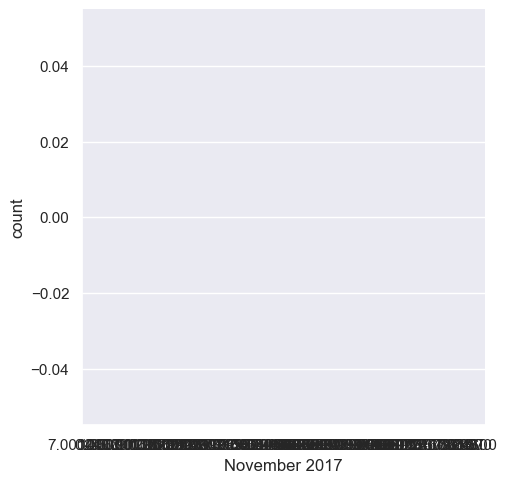

In [60]:
sns.catplot(kind='bar',
            data=new_df,
            x='discount_percent',
            y=new_df.discount_percent.value_counts(),
            #y='count',
            #errorbar='sd', # error bar based on standard deviation rather than confidence interval
            );
plt.xlabel("November 2017");
#plt.title('Average discount_prcntg with 95% Confidence interval');
#plt.savefig("avg_monthly_discount.png")

## Daily income for categories with largest income

In [61]:
products.head()

,sku,name,desc,price,in_stock,type,category
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,8696,
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59.00,0,13855401,
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59.00,0,1387,
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25.00,0,1230,
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.99,1,1364,iMac accessories


In [62]:
orderlines_filtered.head()

,id_order,product_quantity,sku,unit_price,date,tot_unit_price,prod_price,discount,discount_percent,season,tot_prod_price,tot_discount
0,299545,1,OWC0100,47.49,2017-01-01 01:46:16,47.49,60.99,13.50,22.0,None,60.99,13.50
1,299546,1,IOT0014,18.99,2017-01-01 01:50:34,18.99,22.95,3.96,17.0,None,22.95,3.96
2,295347,1,APP0700,72.19,2017-01-01 01:54:11,72.19,89.00,16.81,19.0,None,89.00,16.81
3,299556,1,CRU0039-A,60.90,2017-01-01 02:20:14,60.90,76.99,16.09,21.0,None,76.99,16.09
4,299561,1,PEB0015,142.49,2017-01-01 02:38:50,142.49,299.99,157.50,53.0,None,299.99,157.50


In [63]:
ol_df = orderlines_filtered.merge(products[['sku', 'category']],
                                how="left",
                                left_on="sku",
                                right_on="sku")
ol_df.head()

,id_order,product_quantity,sku,unit_price,date,tot_unit_price,prod_price,discount,discount_percent,season,tot_prod_price,tot_discount,category
0,299545,1,OWC0100,47.49,2017-01-01 01:46:16,47.49,60.99,13.50,22.0,None,60.99,13.50,
1,299546,1,IOT0014,18.99,2017-01-01 01:50:34,18.99,22.95,3.96,17.0,None,22.95,3.96,
2,295347,1,APP0700,72.19,2017-01-01 01:54:11,72.19,89.00,16.81,19.0,None,89.00,16.81,
3,299556,1,CRU0039-A,60.90,2017-01-01 02:20:14,60.90,76.99,16.09,21.0,None,76.99,16.09,Macbook
4,299561,1,PEB0015,142.49,2017-01-01 02:38:50,142.49,299.99,157.50,53.0,None,299.99,157.50,"Drones, smartwatch, security systems"


In [64]:
ol_df.loc[ol_df['category']=='', 'category'] = 'other'
ol_df.head()

,id_order,product_quantity,sku,unit_price,date,tot_unit_price,prod_price,discount,discount_percent,season,tot_prod_price,tot_discount,category
0,299545,1,OWC0100,47.49,2017-01-01 01:46:16,47.49,60.99,13.50,22.0,None,60.99,13.50,other
1,299546,1,IOT0014,18.99,2017-01-01 01:50:34,18.99,22.95,3.96,17.0,None,22.95,3.96,other
2,295347,1,APP0700,72.19,2017-01-01 01:54:11,72.19,89.00,16.81,19.0,None,89.00,16.81,other
3,299556,1,CRU0039-A,60.90,2017-01-01 02:20:14,60.90,76.99,16.09,21.0,None,76.99,16.09,Macbook
4,299561,1,PEB0015,142.49,2017-01-01 02:38:50,142.49,299.99,157.50,53.0,None,299.99,157.50,"Drones, smartwatch, security systems"


In [65]:
ol_df.category.value_counts(normalize=True)

category
other                                   0.445207
External Storage                        0.112643
iPhone accessories                      0.086612
Drones, smartwatch, security systems    0.059833
iMac accessories                        0.058639
Headphones and accessories              0.045421
Adapters                                0.036070
Monitors                                0.027225
Cables                                  0.020363
Servers                                 0.020342
Macbook case and Backpacks              0.019351
Speakers                                0.015404
Installation/Upgrade Kit                0.014290
iPad accessories                        0.013278
Macbook                                 0.011457
Memory card                             0.010283
Mac and accessories                     0.003036
iPhone/iPad repair service              0.000547
Name: proportion, dtype: float64

In [66]:
ol_df.groupby(['category'])[['tot_unit_price', 'tot_prod_price', 'tot_discount']].sum().nlargest(6, 'tot_unit_price')

,tot_unit_price,tot_prod_price,tot_discount
category,,,
other,3344443.10,4042107.69,697664.59
External Storage,1120578.30,1328272.88,207694.58
Monitors,596589.29,692766.37,96177.08
Servers,437342.34,480573.67,43231.33
iMac accessories,358249.91,432676.73,74426.82
"Drones, smartwatch, security systems",271136.81,360733.46,89596.65


In [67]:
top_categories = ['External Storage', 'Monitors', 'Servers']#, 'iMac accessories', 'Drones, smartwatch, security systems']

In [68]:
daily_totals_per_category = (
                            ol_df
                            .loc[ol_df.category.isin(top_categories)]
                            .groupby(['category', 'date'], as_index=False)
                            [['tot_unit_price', 'tot_prod_price', 'tot_discount']]
                            .sum()#.plot(figsize=(14,8))
                            )
daily_totals_per_category

,category,date,tot_unit_price,tot_prod_price,tot_discount
0,External Storage,2017-01-01 17:14:21,98.79,139.95,41.16
1,External Storage,2017-01-01 17:21:43,134.89,134.99,0.10
2,External Storage,2017-01-01 18:00:11,75.04,100.77,25.73
3,External Storage,2017-01-01 20:30:39,153.89,179.99,26.10
4,External Storage,2017-01-01 21:39:58,59.84,75.99,16.15
...,...,...,...,...,...
7906,Servers,2018-03-12 08:40:04,628.18,697.99,69.81
7907,Servers,2018-03-12 10:41:22,439.99,458.99,19.00
7908,Servers,2018-03-12 18:53:31,267.99,273.46,5.47
7909,Servers,2018-03-13 08:29:38,172.99,175.99,3.00


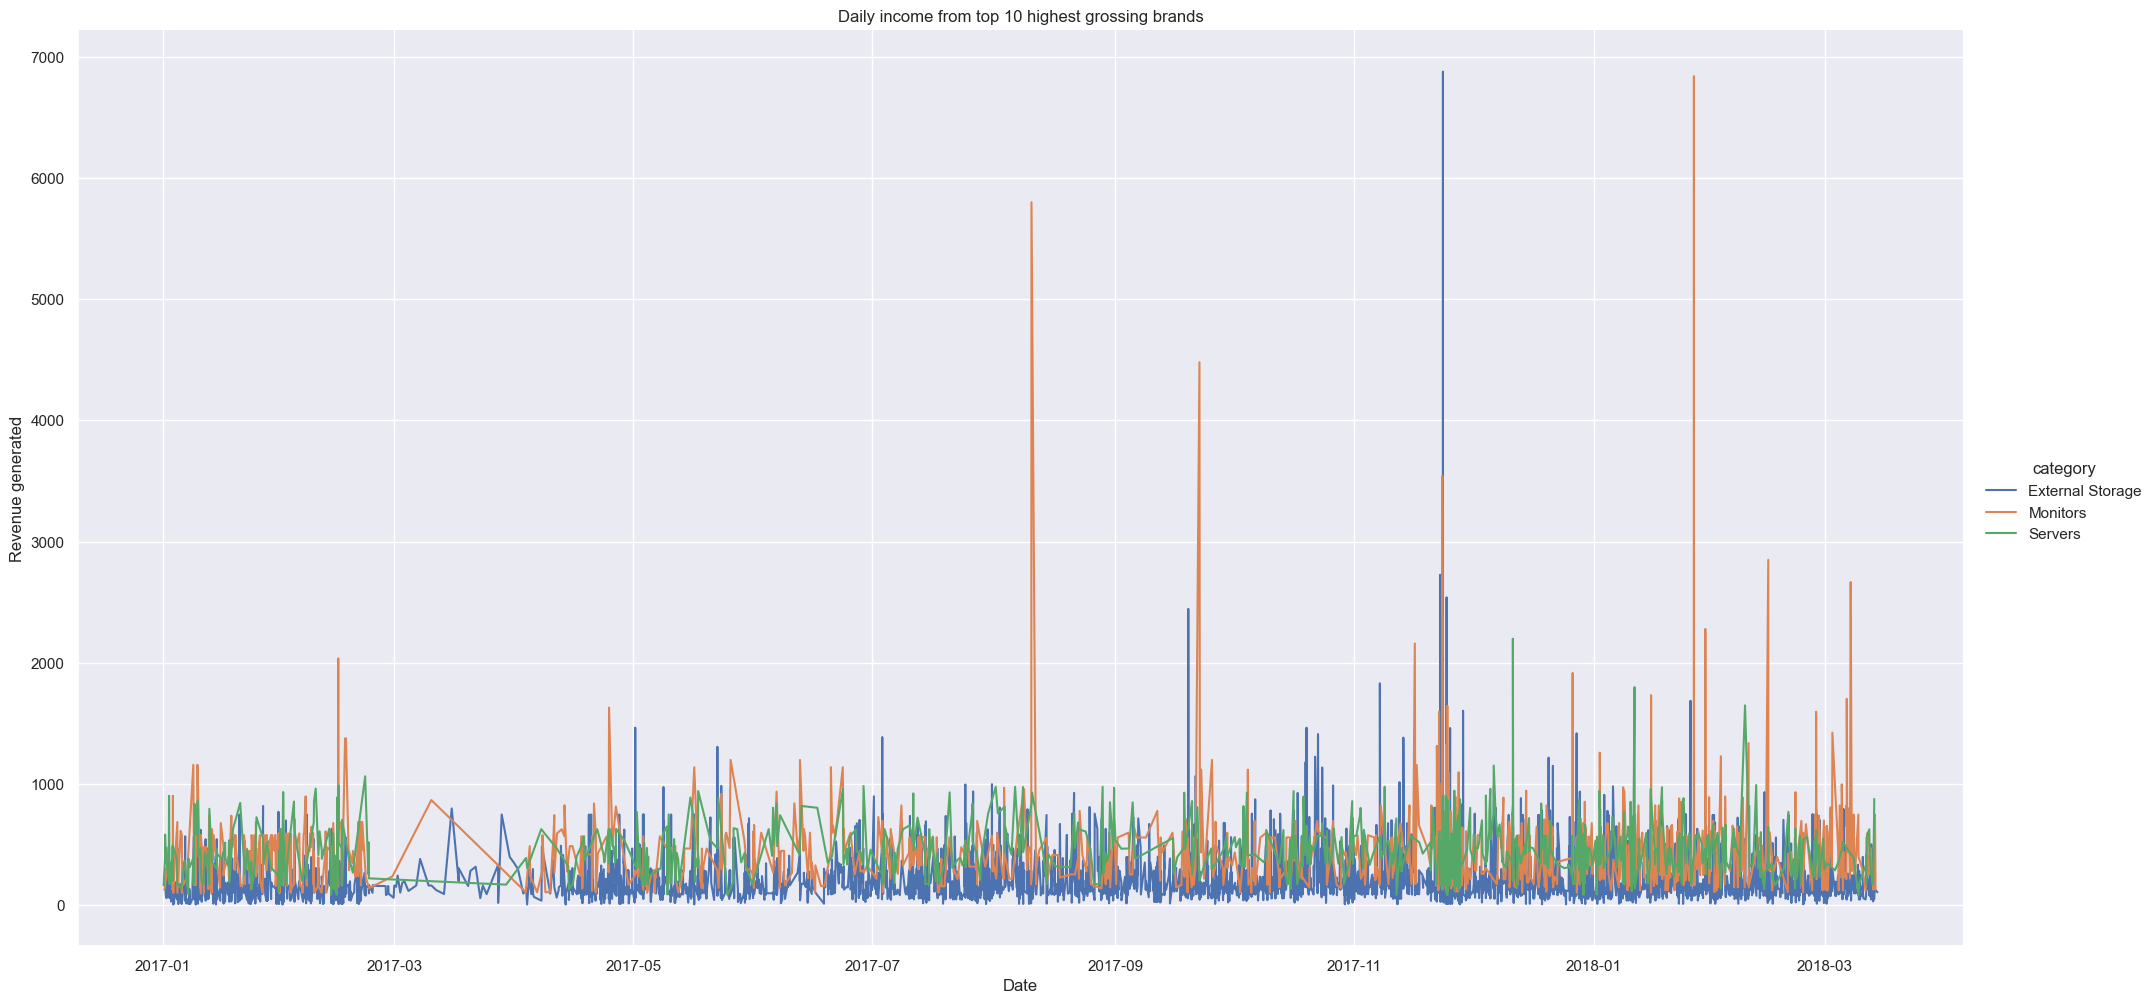

In [69]:
sns.set_theme(style="darkgrid")

(
sns.relplot(data = daily_totals_per_category,
            x="date",
            y="tot_unit_price",
            hue="category",
            kind="line",
            height= 10,
            aspect=2)
    .set_axis_labels("Date",
                     "Revenue generated")
    .set(title="Daily income from top 10 highest grossing brands")
);

import matplotlib.pyplot as plt
#plt.ylim((0,15000))

# Graph Total Revenue and Discounts per month in 2017

In [134]:
orderlines_2017 = orderlines_filtered.loc[orderlines_filtered['date'].dt.year==2017]

new_plot = (orderlines_2017
                .resample("M", on="date")[['tot_unit_price']]
                .sum().reset_index()
           )
new_plot['avg_discount'] = (orderlines_2017
                                .resample("M", on="date")[['discount_percent']]
                                .mean().reset_index().discount_percent
                           )
new_plot['tot_qty_sales'] = (orderlines_2017
                                 .resample("M", on="date")[['product_quantity']]
                                 .sum().reset_index().product_quantity
                            )

new_plot

,date,tot_unit_price,avg_discount,tot_qty_sales
0,2017-01-31,516505.92,27.741436,6240
1,2017-02-28,277994.20,22.409012,2598
2,2017-03-31,18843.70,24.145251,203
3,2017-04-30,206547.95,20.796351,1934
4,2017-05-31,280733.51,18.274973,2220
5,2017-06-30,233123.87,20.334646,1815
6,2017-07-31,543399.03,27.095722,4275
7,2017-08-31,342811.93,22.539759,2790
8,2017-09-30,355711.06,22.501784,2525
9,2017-10-31,510733.95,23.690947,3754


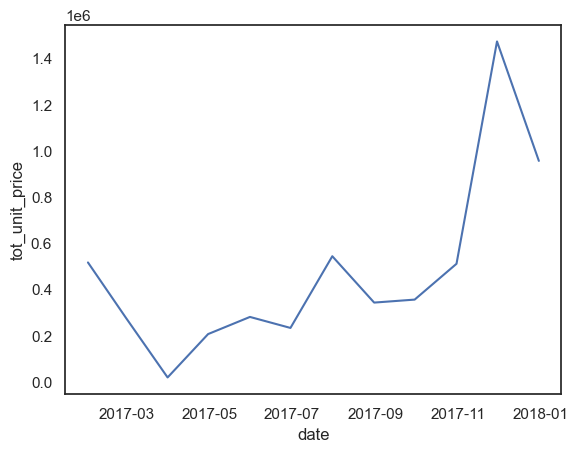

In [135]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.lineplot(data=new_plot,
             x='date',
             y='tot_unit_price',
             #y='avg_discount',
             #y='tot_qty_sales',
             errorbar=None,
             estimator='sum',
             # hue='Name',
             # style='Name',
             markers=True
            );
#plt.show()

# new_plot.plot(x='date'
#              #sharey=True
#              );

In [209]:
new_plot.tot_unit_price.mean()

476267.14749999996

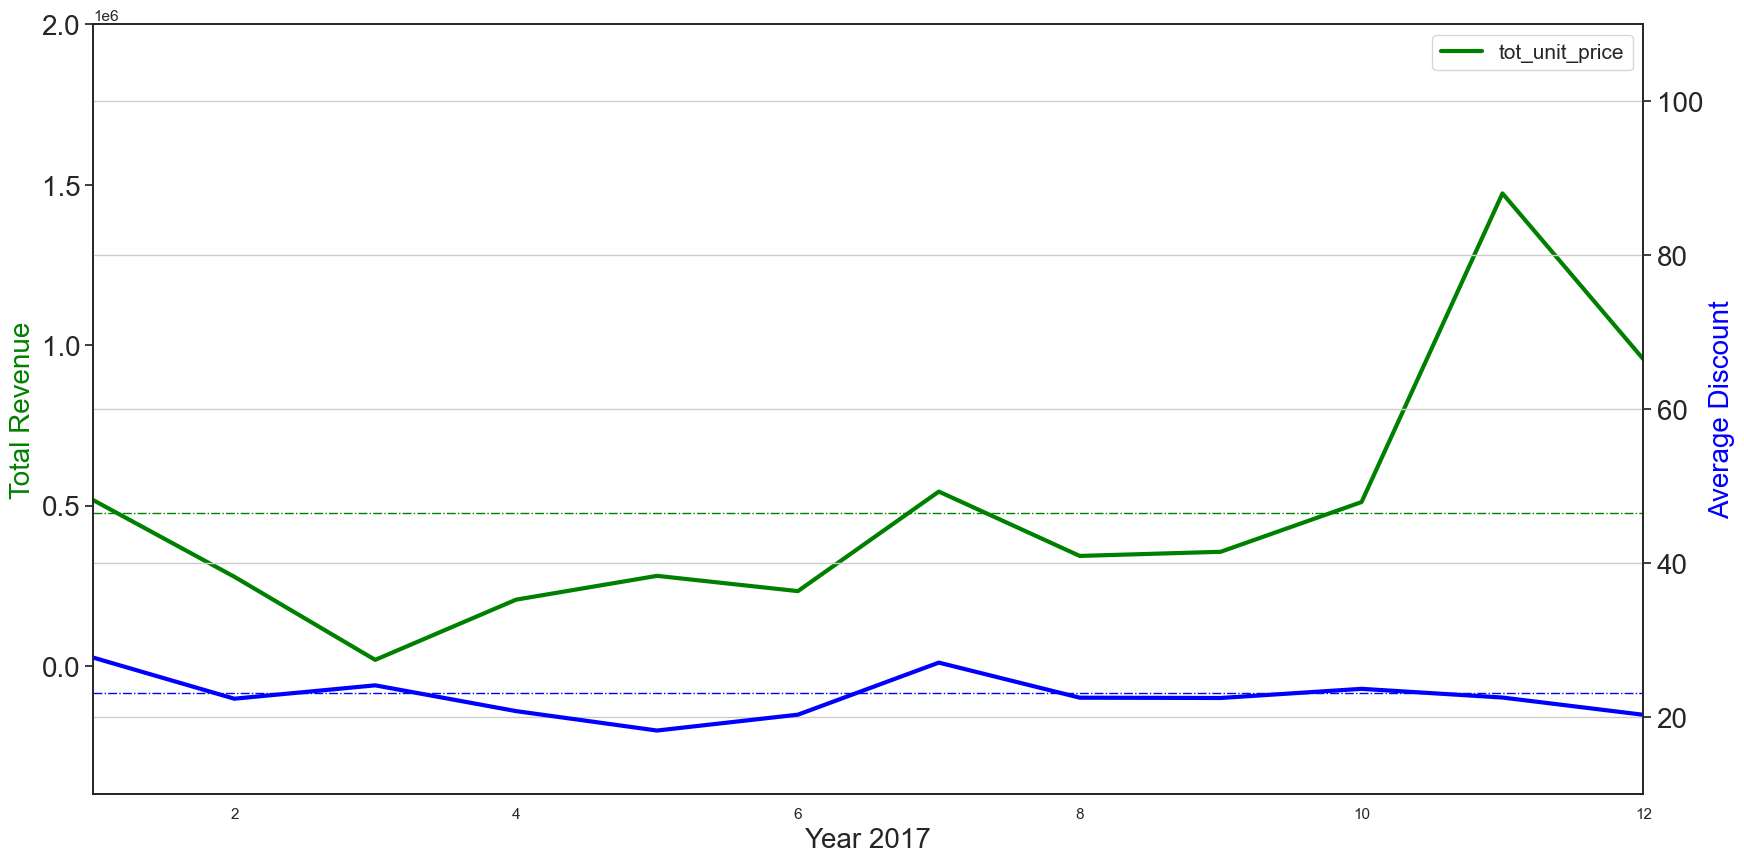

In [139]:
#fig = plt.figure(figsize=(20,10), dpi= 180, facecolor='w', edgecolor='k')



fig,ax = plt.subplots(figsize=(20,10))
ax.plot(new_plot.date.dt.month,new_plot.tot_unit_price,label="tot_unit_price", color="green", lw=3 )
ax.set_xlabel("Year 2017",fontsize=20)
ax.set_ylabel("Total Revenue",color="green",fontsize=20)
plt.yticks(fontsize = 20)
#plt.axis([xmin,xmax,ymin,ymax])
plt.axis([1,12,-400000,2000000])
plt.axhline(y = 476267.15, color = 'green', linestyle = 'dashdot', lw=1, zorder=1)#, label="  ")

ax2=ax.twinx()
ax2.plot(new_plot.date.dt.month,new_plot.avg_discount,label="avg_discount", color="blue", lw=3 )
plt.yticks(fontsize = 20)
ax2.set_ylabel("Average Discount",color="blue",fontsize=20)
#plt.axis([xmin,xmax,ymin,ymax])
plt.axis([1,12,10,110])
plt.axhline(y = 23.12, color = 'blue', linestyle = 'dashdot', lw=1, zorder=1)#, label="  ")

handles, _ = ax.get_legend_handles_labels()
ax.legend(markerscale=5,loc='best',fontsize=15,frameon=True)
plt.grid()
plt.show()
#fig.savefig('prova.jpg',format='jpeg',dpi=100,bbox_inches='tight')

# Graph Total Revenue and Discounts per week in 2017

In [122]:
orderlines_2017 = orderlines_filtered.loc[orderlines_filtered['date'].dt.year==2017]

df_weeks_2017 = (orderlines_2017
                .resample("W", on="date")[['tot_unit_price']]
                .sum().reset_index()
           )
df_weeks_2017['avg_discount'] = (orderlines_2017
                                .resample("W", on="date")[['discount_percent']]
                                .mean().reset_index().discount_percent
                           )
df_weeks_2017['tot_qty_sales'] = (orderlines_2017
                                 .resample("W", on="date")[['product_quantity']]
                                 .sum().reset_index().product_quantity
                            )

df_weeks_2017.head()

,date,tot_unit_price,avg_discount,tot_qty_sales
0,2017-01-01,12529.25,23.358974,129
1,2017-01-08,116776.24,25.818182,1392
2,2017-01-15,127704.85,29.741821,1585
3,2017-01-22,98291.32,25.757209,1239
4,2017-01-29,101492.93,31.011607,1279


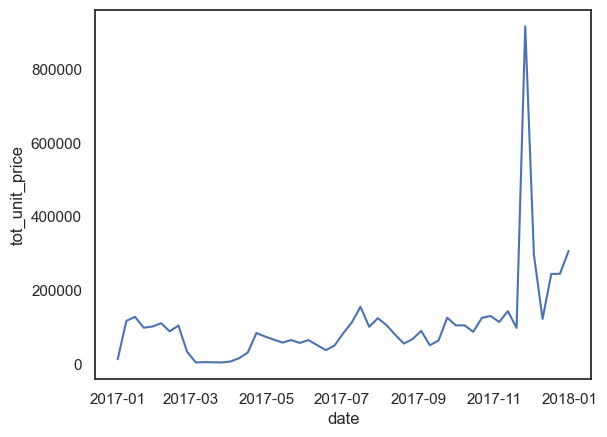

In [123]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.lineplot(data=df_weeks_2017,
             x='date',
             y='tot_unit_price',
             #y='avg_discount',
             #y='tot_qty_sales',
             errorbar=None,
             estimator='sum',
             # hue='Name',
             # style='Name',
             markers=True
            );
#plt.show()

# new_plot.plot(x='date'
#              #sharey=True
#              );

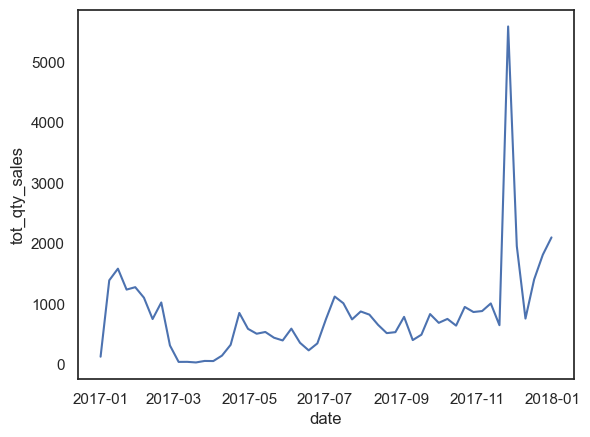

In [124]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.lineplot(data=df_weeks_2017,
             x='date',
             #y='tot_unit_price',
             #y='avg_discount',
             y='tot_qty_sales',
             errorbar=None,
             estimator='sum',
             markers=True
            );

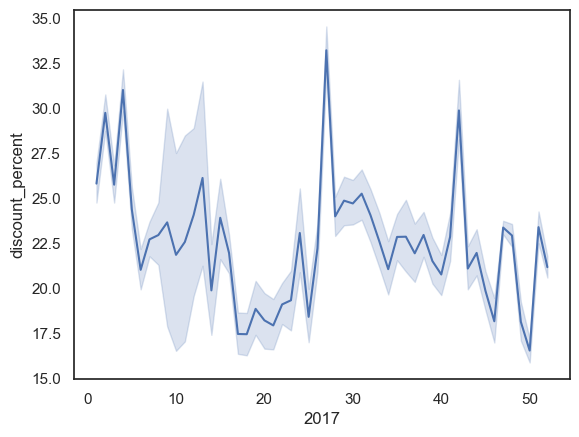

In [125]:
sns.lineplot(#kind='bar',
            data=orderlines_filtered.loc[orderlines_filtered['date'].dt.year==2017],
            x=orderlines_filtered.date.dt.isocalendar().week,
            y='discount_percent',
            #errorbar='sd', # error bar based on standard deviation rather than confidence interval
            );
plt.xlabel("2017");
#plt.title('Average discount_prcntg with 95% Confidence interval');
#plt.savefig("avg_monthly_discount.png")

In [212]:
df_weeks_2017.avg_discount.mean()

22.550001286439958

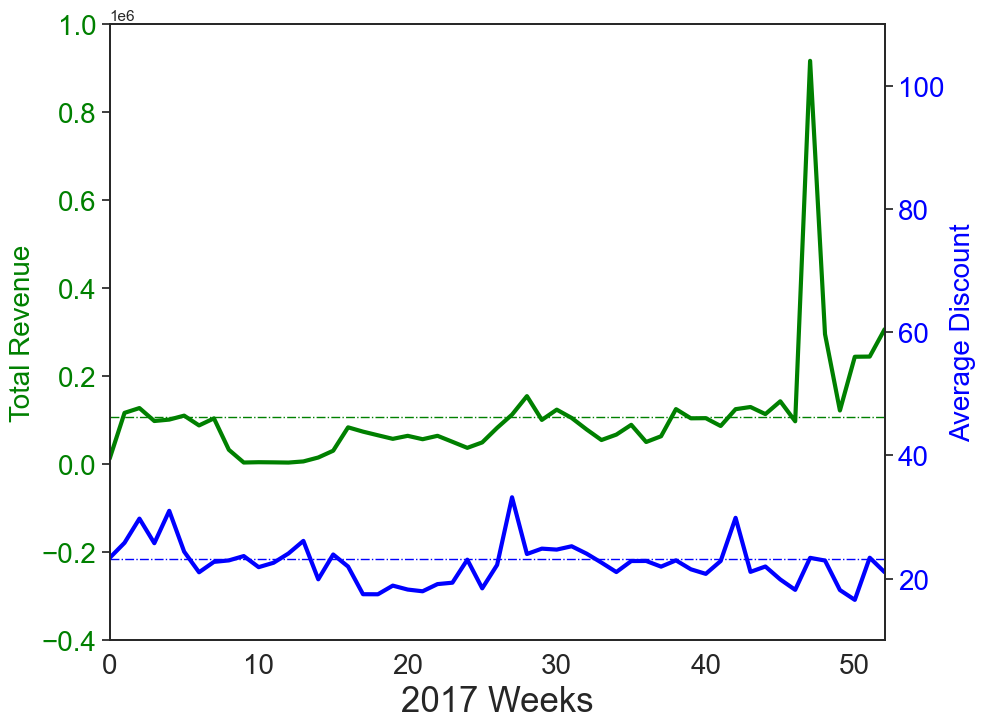

In [219]:
sns.set_theme(style="white")

fig,ax = plt.subplots(figsize=(10,8))
ax.set_xlabel("2017 Weeks",fontsize=25)
plt.xticks(fontsize = 20)

# total revenue lineplot
ax.plot(#df_weeks_2017.date.dt.isocalendar().week,
        df_weeks_2017.index,
        df_weeks_2017.tot_unit_price,
        label="tot_unit_price",
        color="green",
        lw=3
       )
ax.set_ylabel("Total Revenue",color="green",fontsize=20)
plt.yticks(color='green', fontsize = 20)
#plt.axis([xmin,xmax,ymin,ymax])
plt.axis([0,52,-400000,1000000])
plt.axhline(y = 107834.07, color = 'green', linestyle = 'dashdot', lw=1, zorder=1)#, label="  ")

# average discount lineplot
ax2=ax.twinx()
ax2.plot(df_weeks_2017.index,
         df_weeks_2017.avg_discount,#-23.12,
         label="avg_discount",
         color="blue",
         lw=3
        )
plt.yticks(color='blue', fontsize = 20)
ax2.set_ylabel("Average Discount",color="blue",fontsize=20)
#plt.axis([xmin,xmax,ymin,ymax])
plt.axis([0,52,10,110])
plt.axhline(y = 23.12, color = 'blue', linestyle = 'dashdot', lw=1, zorder=1)#, label="  ")

#handles, _ = ax.get_legend_handles_labels()
#ax.legend(markerscale=5,loc='best',fontsize=15,frameon=True)
#plt.grid()
plt.show()
#plt.savefig("totRevenue_vs_avgDiscount.png");
fig.savefig('totRevenue_vs_avgDiscount.png',format='png',dpi=100,bbox_inches='tight');

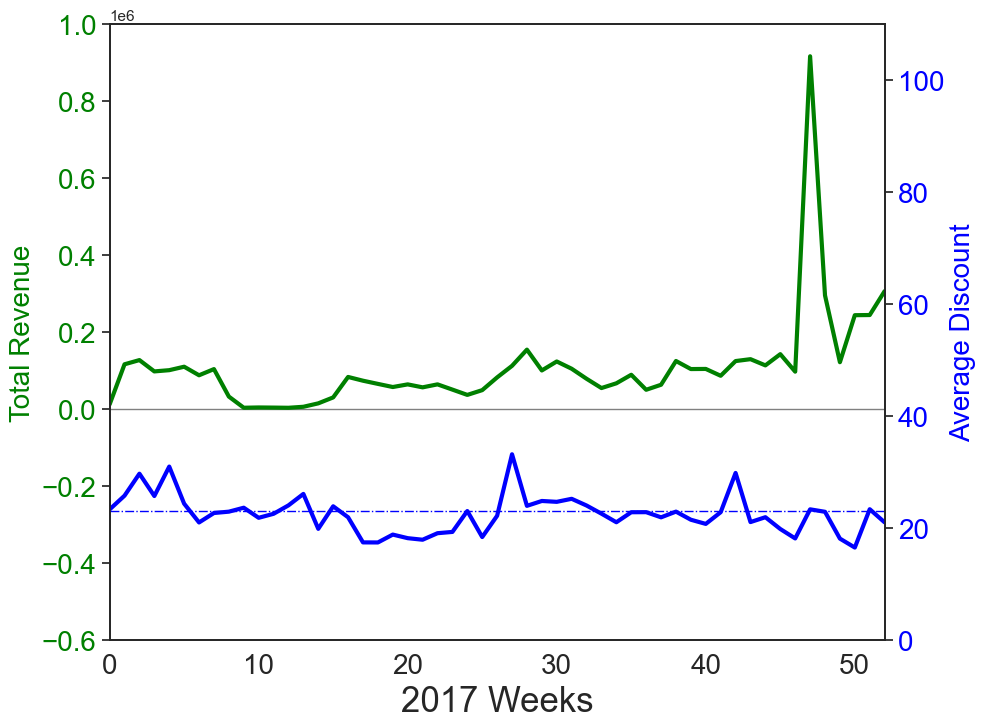

In [220]:
sns.set_theme(style="white")

fig,ax = plt.subplots(figsize=(10,8))
ax.set_xlabel("2017 Weeks",fontsize=25)
plt.xticks(fontsize = 20)

# total revenue lineplot
ax.plot(#df_weeks_2017.date.dt.isocalendar().week,
        df_weeks_2017.index,
        df_weeks_2017.tot_unit_price,
        label="tot_unit_price",
        color="green",
        lw=3
       )
ax.set_ylabel("Total Revenue",color="green",fontsize=20)
plt.yticks(color='green', fontsize = 20)
#plt.axis([xmin,xmax,ymin,ymax])
plt.axis([0,52,-600000,1000000])
#plt.axhline(y = 107834.07, color = 'green', linestyle = 'dashdot', lw=1, zorder=1)
plt.axhline(y = 0, color = 'gray', linestyle = '-', lw=1, zorder=1)

# average discount lineplot
ax2=ax.twinx()
ax2.plot(df_weeks_2017.index,
         df_weeks_2017.avg_discount,#-23.12,
         label="avg_discount",
         color="blue",
         lw=3
        )
plt.yticks(color='blue', fontsize = 20)
ax2.set_ylabel("Average Discount",color="blue",fontsize=20)
#plt.axis([xmin,xmax,ymin,ymax])
plt.axis([0,52,0,110])
plt.axhline(y = 23.12, color = 'blue', linestyle = 'dashdot', lw=1, zorder=1)

#handles, _ = ax.get_legend_handles_labels()
#ax.legend(markerscale=5,loc='best',fontsize=15,frameon=True)
#plt.grid()
plt.show()
#plt.savefig("totRevenue_vs_avgDiscount.png");
fig.savefig('totRevenue_vs_avgDiscount2.png',format='png',dpi=100,bbox_inches='tight');